# Задание 1. Обнаружение и обработка пропущенных значений

### 1) Загрузка дадасета

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer

df = sns.load_dataset("titanic")
display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 2)Определим количество пропущенных значений в каждом столбце

In [14]:
print("Пропущенные значения до обработки:\n")
print(df.isna().sum())

Пропущенные значения до обработки:

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


### 3)Визуализируем пропуски используя matplotlib

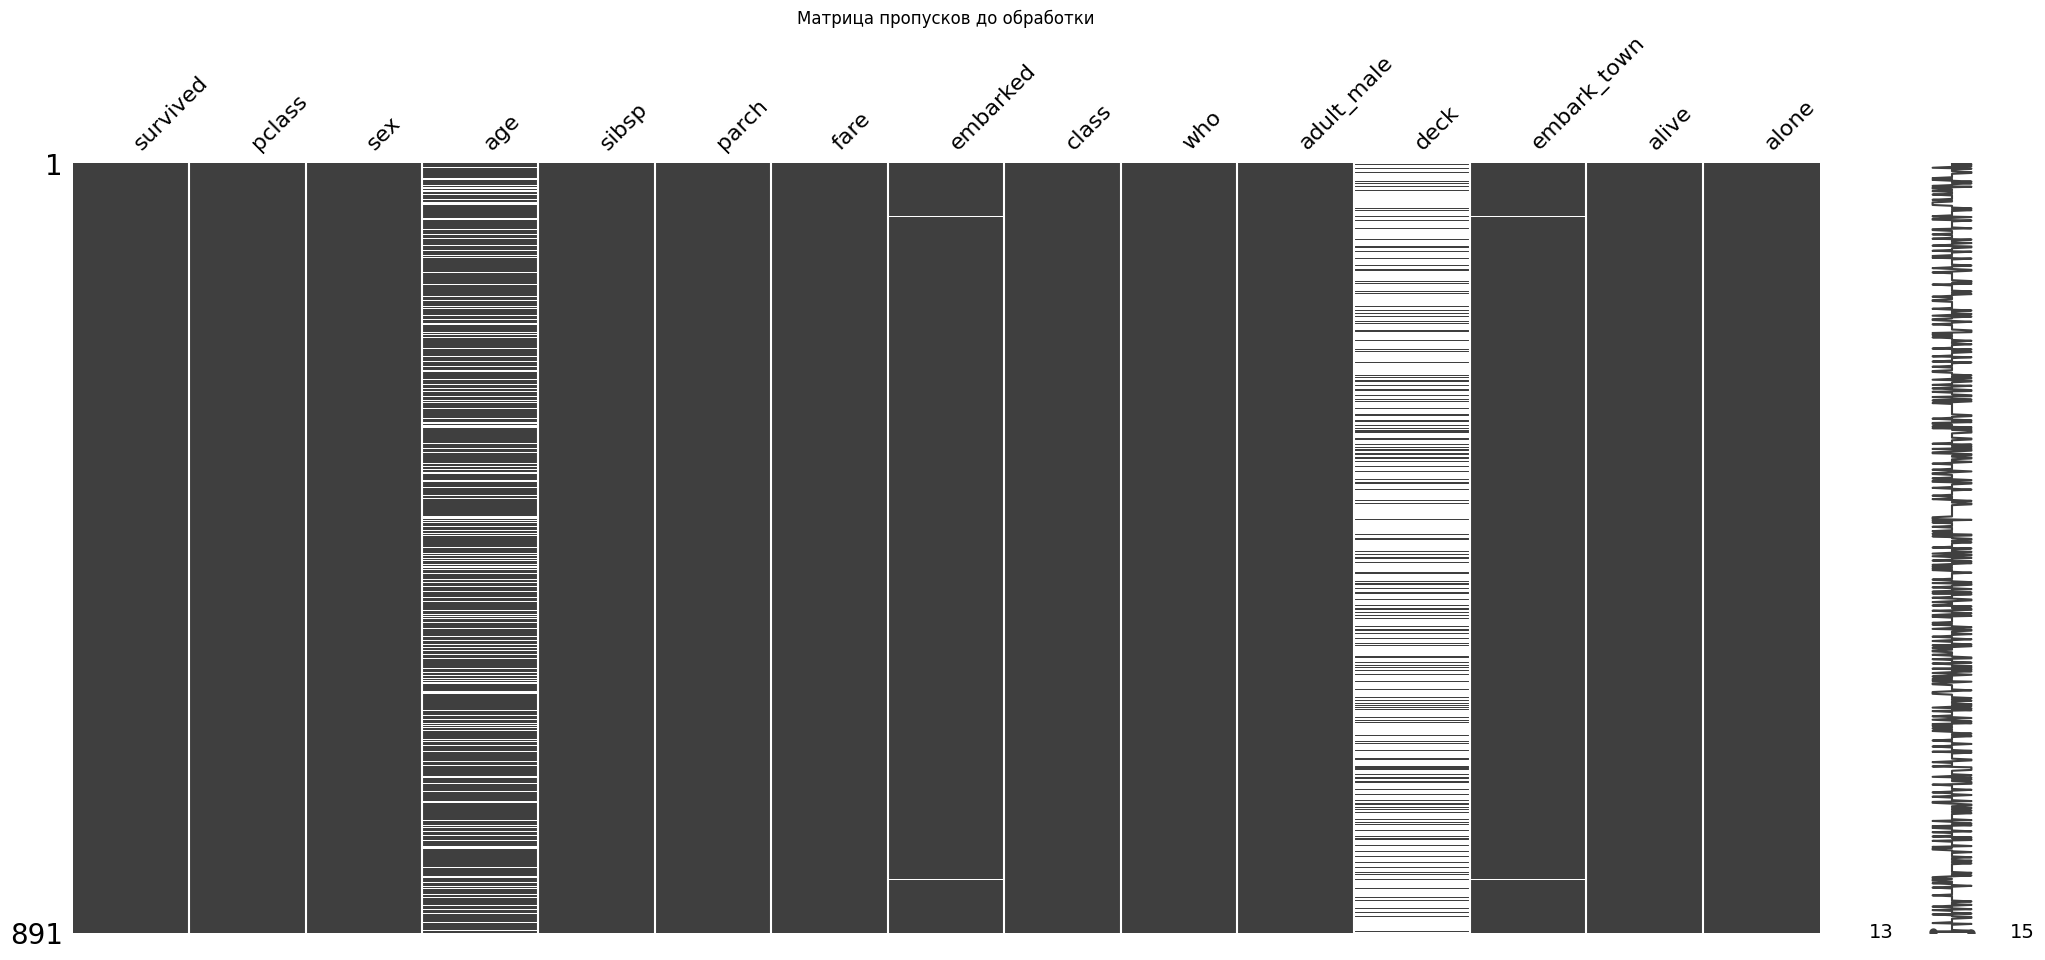

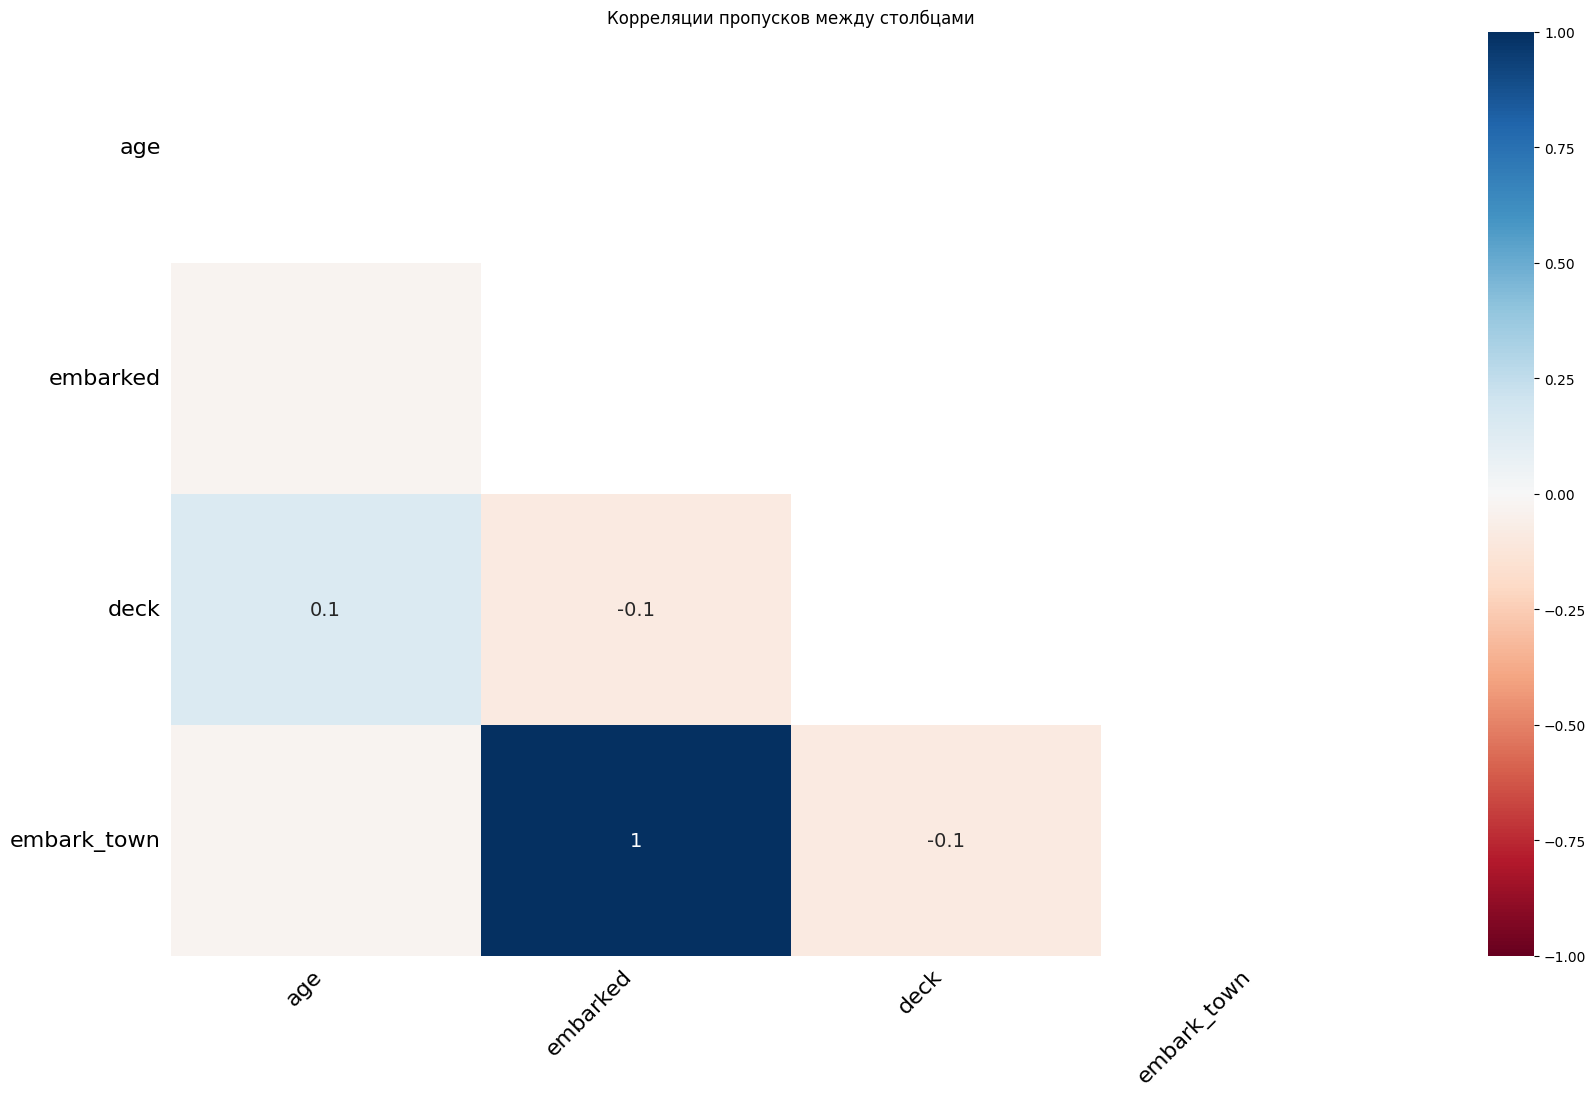

In [15]:
msno.matrix(df)
plt.title("Матрица пропусков до обработки")
plt.show()


msno.heatmap(df)
plt.title("Корреляции пропусков между столбцами")
plt.show()

### 4)Информация до обработки

In [16]:
print("\nИнформация о данных до обработки:\n")
df.info()


Информация о данных до обработки:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### 5) Обработка пропусков

In [17]:
imputer_age = SimpleImputer(strategy='mean')
df['age'] = imputer_age.fit_transform(df[['age']]).ravel()

imputer_embarked = SimpleImputer(strategy='most_frequent')
df['embark_town'] = imputer_embarked.fit_transform(df[['embark_town']]).ravel()
df['embarked'] = imputer_embarked.fit_transform(df[['embarked']]).ravel()
df.drop(columns='deck', inplace=True)

print("\nПропущенные значения после обработки:\n")
print(df.isna().sum())


Пропущенные значения после обработки:

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


### 6)Инофрмация после обработки

In [18]:
print("\nИнформация о данных после обработки:\n")
df.info()


Информация о данных после обработки:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


### 7)Визуализация после обработки

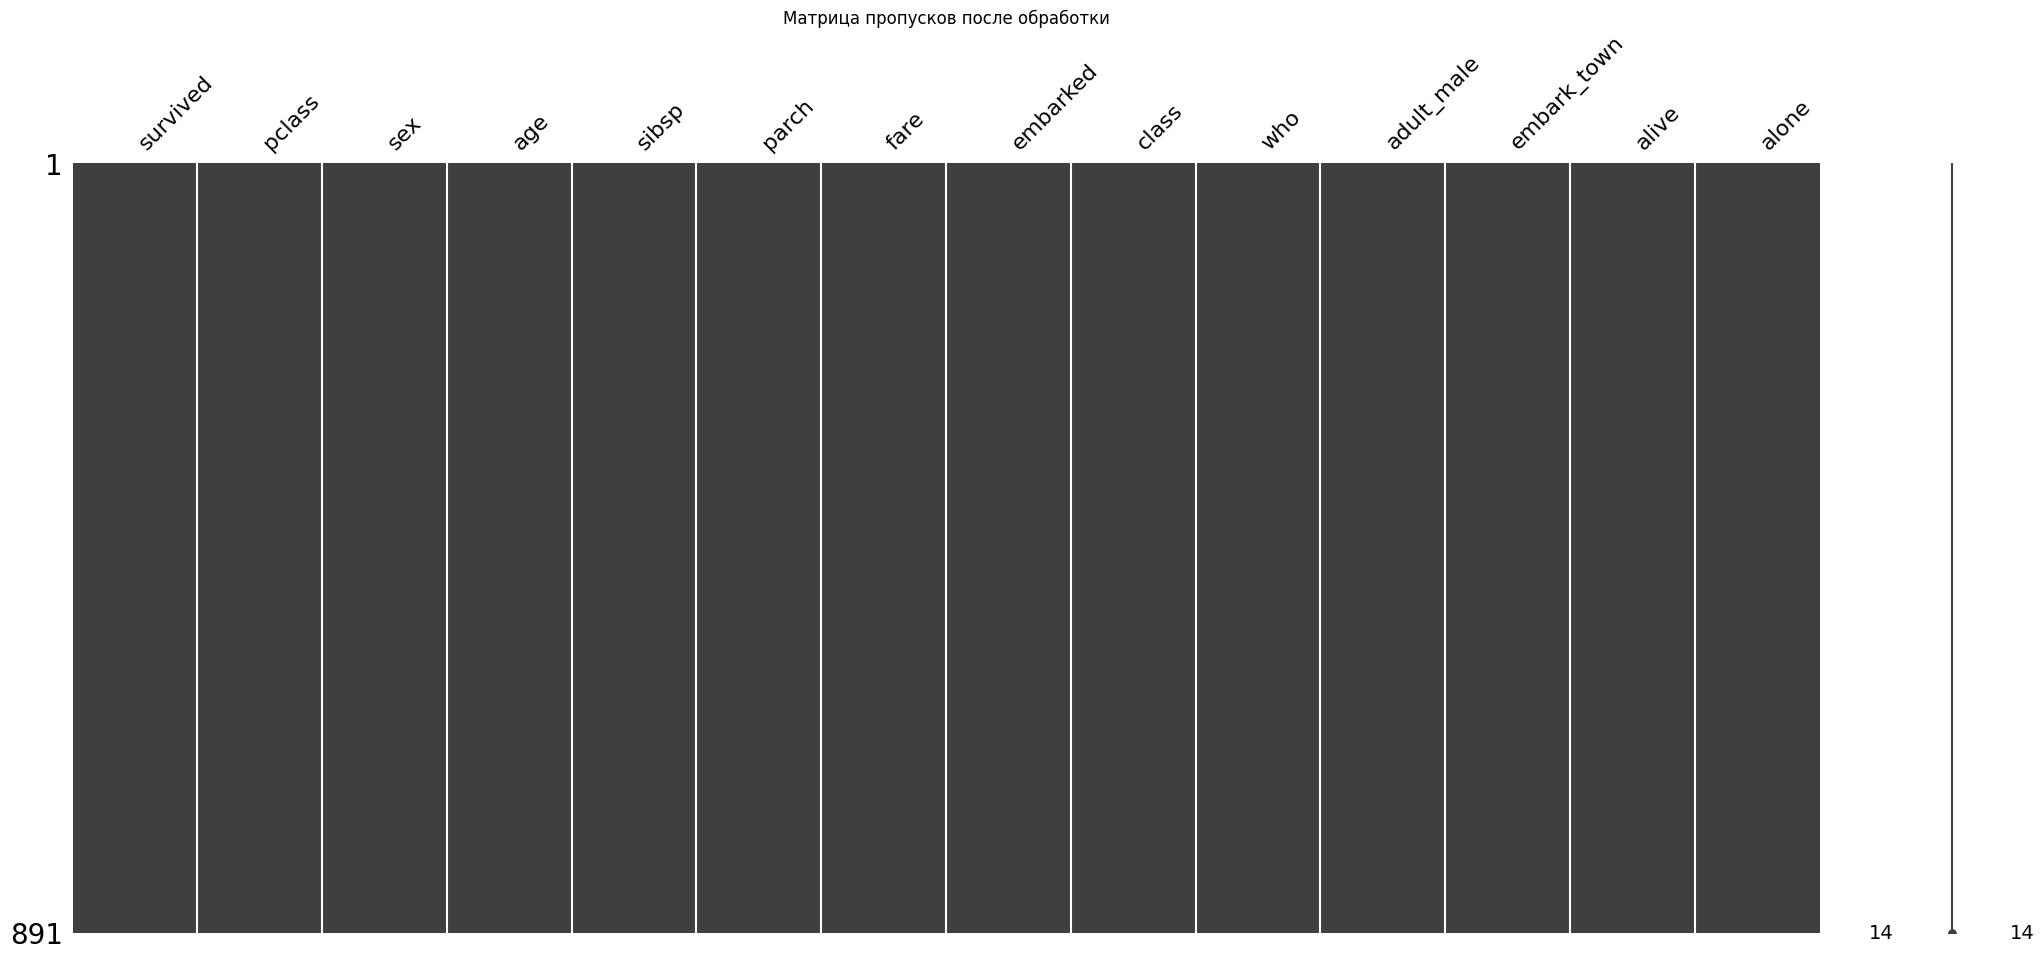

In [19]:
msno.matrix(df)
plt.title("Матрица пропусков после обработки")
plt.show()

# Задание 2. Обнаружение и удаление выбросов

### 1) Загрузка дадасета

In [133]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer

df = sns.load_dataset("penguins")
display(df.head())


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 2)Постройте boxplot-графики для признаков bill_length_mm , bill_depth_mm ,flipper_length_mm , body_mass_g

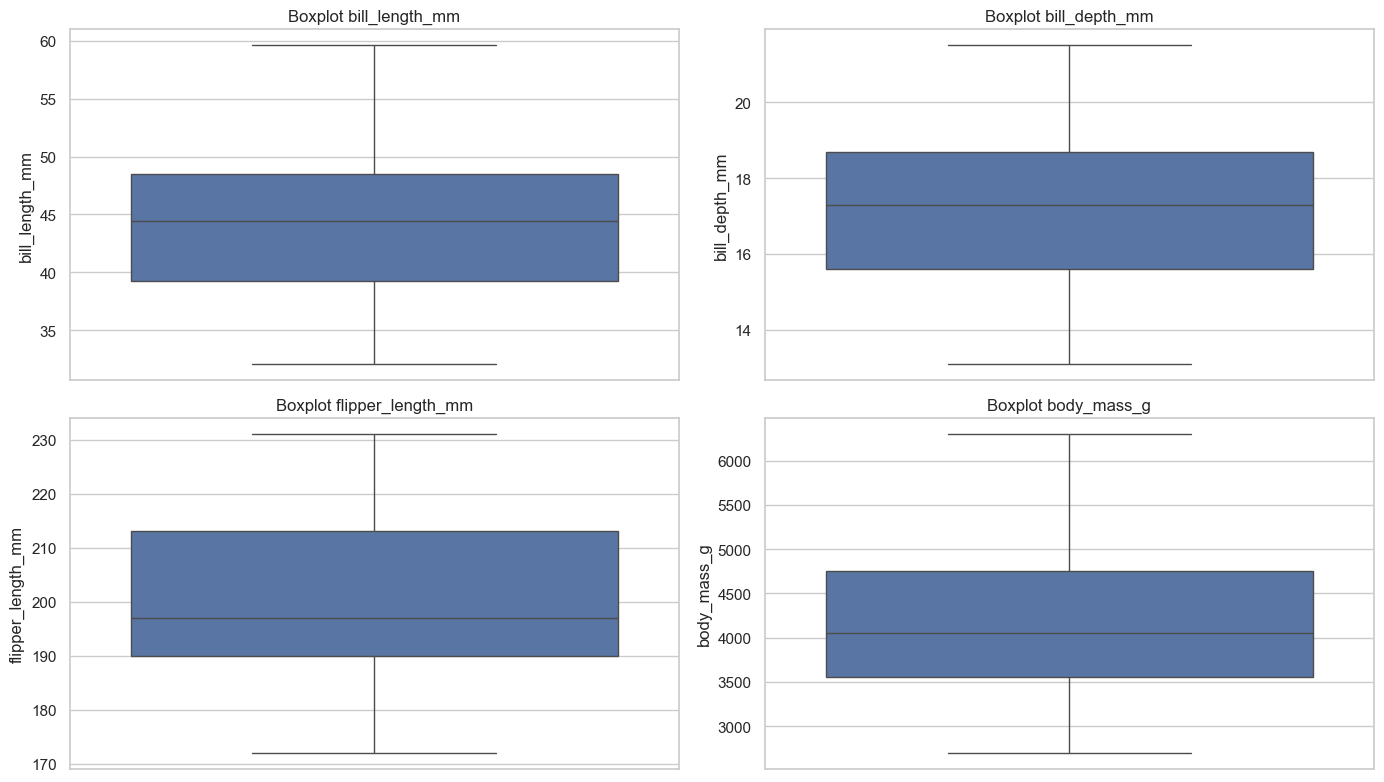

In [134]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


plt.figure(figsize=(14, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

### 3)Используя метод межквартильного размаха (IQR), выявите и удалите выбросы по каждому из указанных признаков

In [135]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Размер до удаления выбросов:", df.shape)

df_filtered = df.copy()
for col in features:
    df_filtered = remove_outliers_iqr(df_filtered, col)

print("Размер после удаления выбросов:", df_filtered.shape)

Размер до удаления выбросов: (344, 7)
Размер после удаления выбросов: (342, 7)


### 4) Сравните размеры датасета до и после фильтрации.

In [136]:
print("До удаления:", df.shape)
print("После удаления:", df_filtered.shape)

До удаления: (344, 7)
После удаления: (342, 7)


### 5) Boxplot до и после удаления выбросов (например, для bill_length_mm)

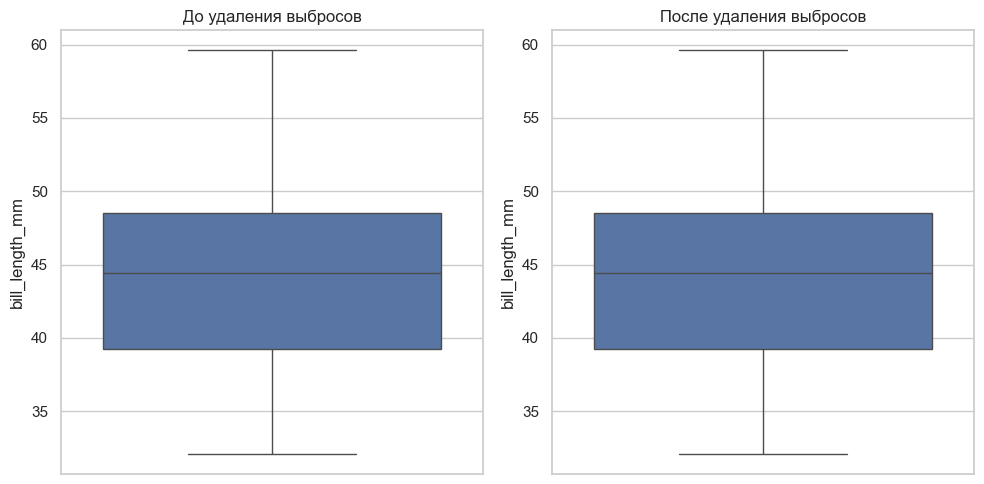

In [137]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='bill_length_mm')
plt.title("До удаления выбросов")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered, y='bill_length_mm')
plt.title("После удаления выбросов")

plt.tight_layout()
plt.show()

# Задание 3. Масштабирование числовых признаков

### 1) Загрузка данных с помощью fetch_california_housing(as_frame=True)

In [138]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)


### 2)Преобразуйте данные в pandas.DataFrame .

In [139]:
df = data.frame
display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 3) стандартизацию признаков с помощью StandardScaler

In [140]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

df_standardized = df.copy()
df_standardized[df.columns] = standard_scaler.fit_transform(df)

display(df_standardized.head())



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


### 4)нормализацию в диапазон [0, 1] с помощью MinMaxScaler (на копии таблицы)

In [141]:
from sklearn.preprocessing import  MinMaxScaler

minmax_scaler = MinMaxScaler()

df_minmax = df.copy()
df_minmax[df.columns] = minmax_scaler.fit_transform(df)

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


### 5)Гистограммы распределения признака MedInc до и после масштабирования

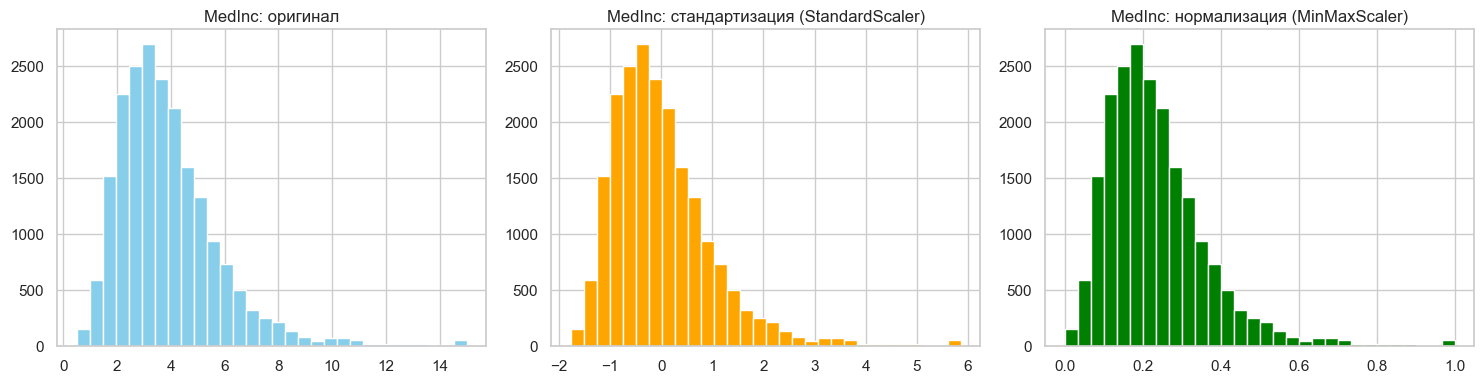

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))


plt.subplot(1, 3, 1)
plt.hist(df['MedInc'], bins=30, color='skyblue')
plt.title('MedInc: оригинал')


plt.subplot(1, 3, 2)
plt.hist(df_standardized['MedInc'], bins=30, color='orange')
plt.title('MedInc: стандартизация (StandardScaler)')


plt.subplot(1, 3, 3)
plt.hist(df_minmax['MedInc'], bins=30, color='green')
plt.title('MedInc: нормализация (MinMaxScaler)')

plt.tight_layout()
plt.show()

### 6) На гистограммах видно, что стандартизация (StandardScaler) сохраняет форму распределения, но сдвигает его в центр (среднее = 0) и масштабирует по стандартному отклонению. Нормализация (MinMaxScaler) также сохраняет форму, но сжимает данные в диапазон от 0 до 1. Визуально распределения остаются похожими, но отличаются шкалой по оси X. Это показывает, что оба метода масштабируют данные, не искажая их распределение.

# Задание 4. Кодирование категориальных признаков

### 1) Загрузка данных и отбор признаков

In [143]:
from sklearn.datasets import fetch_openml
import pandas as pd


data = fetch_openml("adult", version=2, as_frame=True)
df = data.frame


df = data.data[['education', 'marital-status', 'occupation']].copy()

df['income'] = data.target

print("До кодирования:")
display(df.head())

До кодирования:


,education,marital-status,occupation,income
0,11th,Never-married,Machine-op-inspct,<=50K
1,HS-grad,Married-civ-spouse,Farming-fishing,<=50K
2,Assoc-acdm,Married-civ-spouse,Protective-serv,>50K
3,Some-college,Married-civ-spouse,Machine-op-inspct,>50K
4,Some-college,Never-married,NaN,<=50K


### 2)Label Encoding для education (упорядоченный признак)

In [144]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['education_encoded'] = le.fit_transform(df['education'])

display(df.head())

,education,marital-status,occupation,income,education_encoded
0,11th,Never-married,Machine-op-inspct,<=50K,1
1,HS-grad,Married-civ-spouse,Farming-fishing,<=50K,11
2,Assoc-acdm,Married-civ-spouse,Protective-serv,>50K,7
3,Some-college,Married-civ-spouse,Machine-op-inspct,>50K,15
4,Some-college,Never-married,NaN,<=50K,15


### 3) Применение One-Hot Encoding для marital-status и occupation

In [145]:
df_encoded = pd.get_dummies(df, columns=['marital-status', 'occupation'], drop_first=True)

display(df_encoded.head())

,education,income,education_encoded,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,11th,<=50K,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,HS-grad,<=50K,11,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,Assoc-acdm,>50K,7,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,Some-college,>50K,15,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,Some-college,<=50K,15,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 4) Сравнение размерностей

In [146]:
print("Размер до кодирования:", df.shape)
print("Размер после кодирования:", df_encoded.shape)

Размер до кодирования: (48842, 5)
Размер после кодирования: (48842, 22)


### 5) Проверка отсутствия дамми-ловушки

In [147]:
marital_cols = [col for col in df_encoded.columns if col.startswith('marital-status_')]
occupation_cols = [col for col in df_encoded.columns if col.startswith('occupation_')]

print("Количество one-hot колонок для marital-status:", len(marital_cols))
print("Количество one-hot колонок для occupation:", len(occupation_cols))

print("Примеры столбцов marital-status:", marital_cols[:3])
print("Примеры столбцов occupation:", occupation_cols[:3])

Количество one-hot колонок для marital-status: 6
Количество one-hot колонок для occupation: 13
Примеры столбцов marital-status: ['marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent']
Примеры столбцов occupation: ['occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial']


# Задание 5. Комплексный EDA

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


%matplotlib inline
sns.set(style="whitegrid")

### 1)Обзор структуры данных

In [149]:
df = pd.read_csv('data/heart.csv')


display(df.head())


df.info()


df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 2)  Обнаружение и обработка пропущенных значений

In [150]:
print("Пропущенные значения по колонкам:")
print(df.isnull().sum())

Пропущенные значения по колонкам:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### 3) Обнаружение и удаление выбросов по признакам: age, cholesterol, restingbp, maxhr

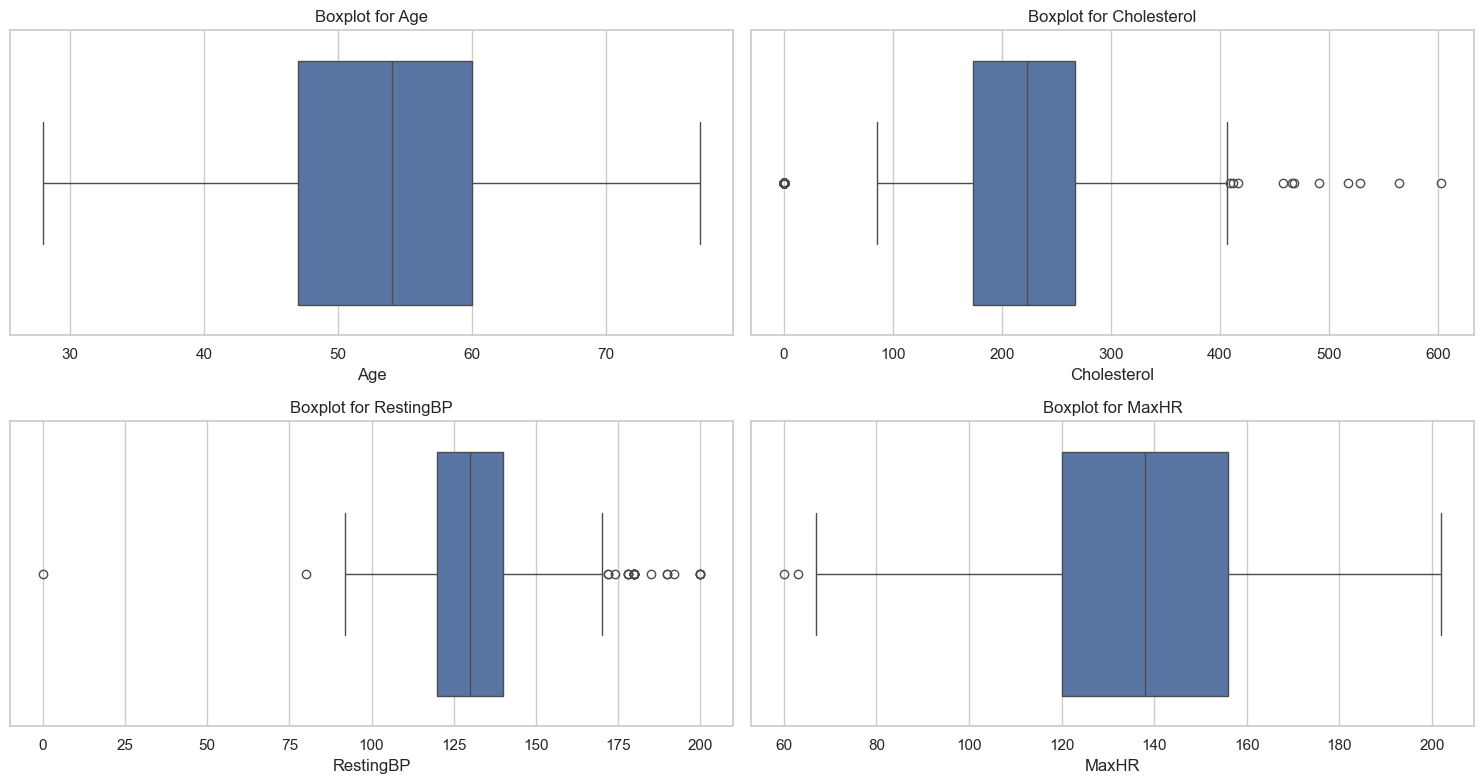

In [151]:
def plot_boxplots(df, features):
    plt.figure(figsize=(15, 8))
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot for {feature}')
    plt.tight_layout()
    plt.show()

features_to_check = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']
plot_boxplots(df, features_to_check)

### Удаление выбросов через IQR

Размер датасета до очистки: (918, 12)
Размер датасета после очистки: (715, 12)


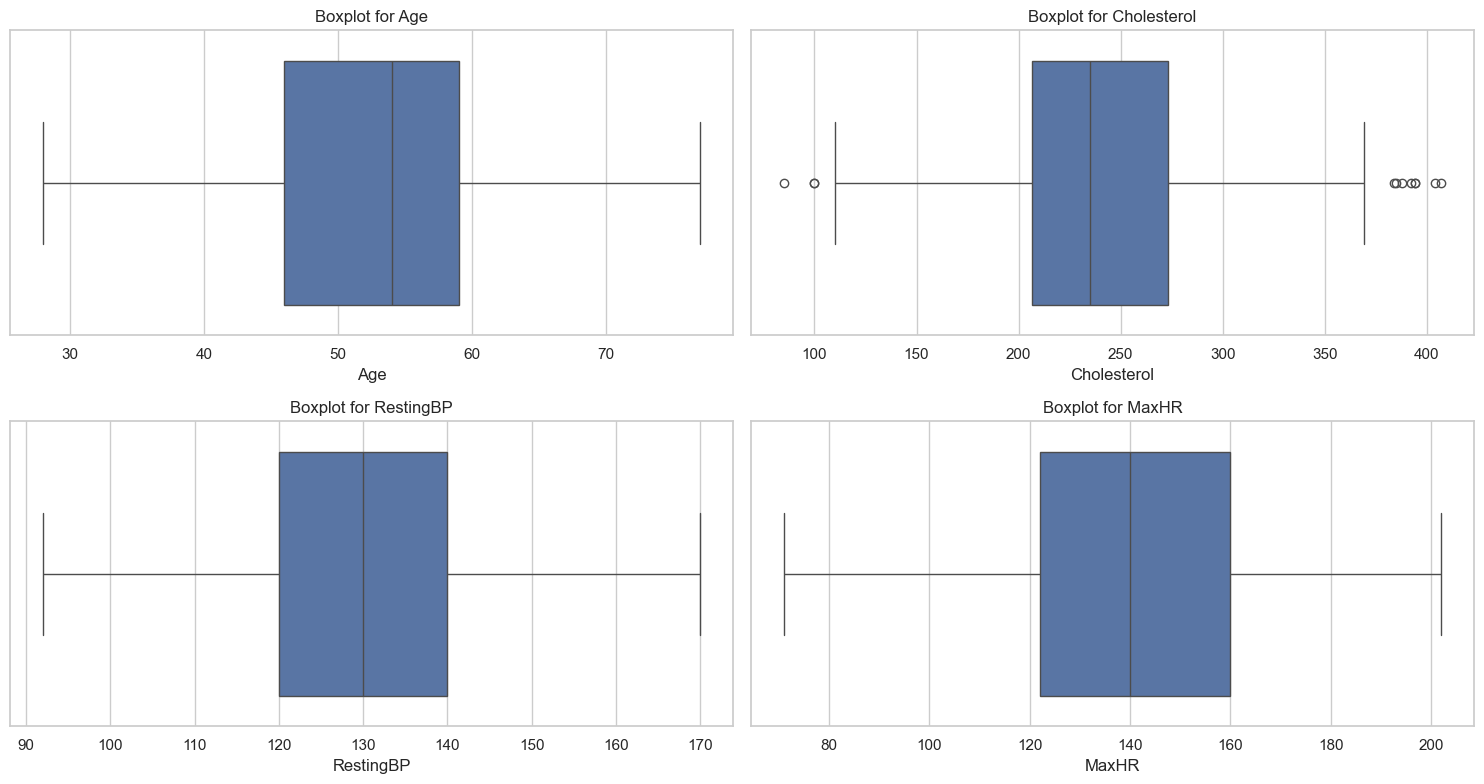

In [152]:
def remove_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

df_clean = remove_outliers_iqr(df, features_to_check)


print(f"Размер датасета до очистки: {df.shape}")
print(f"Размер датасета после очистки: {df_clean.shape}")


plot_boxplots(df_clean, features_to_check)

### 4) Масштабирование числовых признаков


In [153]:
num_features = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']

scaler = StandardScaler()
df_clean[num_features] = scaler.fit_transform(df_clean[num_features])


df_clean[num_features].describe()

,Age,Cholesterol,RestingBP,MaxHR
count,7.150000e+02,7.150000e+02,7.150000e+02,7.150000e+02
mean,-3.180051e-16,-1.714246e-16,7.478090e-16,2.981298e-16
std,1.000700e+00,1.000700e+00,1.000700e+00,1.000700e+00
min,-2.601504e+00,-3.047572e+00,-2.574934e+00,-2.849613e+00
25%,-7.149116e-01,-6.594445e-01,-7.583156e-01,-7.558124e-01
50%,1.235740e-01,-9.926649e-02,-1.095234e-01,-1.682390e-02
75%,6.476275e-01,6.476376e-01,5.392688e-01,8.042744e-01
max,2.534220e+00,3.281457e+00,2.485645e+00,2.528581e+00


### 5)Кодирование категориальных признаков: sex, chestpain, exerciseangina, restecg

In [154]:
cat_features = ['Sex', 'ChestPainType', 'ExerciseAngina', 'RestingECG']
for col in cat_features:
    print(f"{col} unique values: {df_clean[col].unique()}")



df_clean['Sex'] = df_clean['Sex'].map({'M':1, 'F':0}) if df_clean['Sex'].dtype == object else df_clean['Sex']
df_clean['ExerciseAngina'] = df_clean['ExerciseAngina'].map({'Y':1, 'N':0}) if df_clean['ExerciseAngina'].dtype == object else df_clean['ExerciseAngina']


df_clean = pd.get_dummies(df_clean, columns=['ChestPainType', 'RestingECG'], drop_first=True)


df_clean.head()

Sex unique values: ['M' 'F']
ChestPainType unique values: ['ATA' 'NAP' 'ASY' 'TA']
ExerciseAngina unique values: ['N' 'Y']
RestingECG unique values: ['Normal' 'ST' 'LVH']


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,-1.343776,1,0.539269,0.962124,0,1.296933,0,0.0,Up,0,True,False,False,True,False
1,-0.400479,0,1.836853,-1.180312,0,0.640055,0,1.0,Flat,1,False,True,False,True,False
2,-1.658208,1,-0.109523,0.844191,0,-1.741130,0,0.0,Up,0,True,False,False,False,True
3,-0.505290,0,0.409510,-0.512029,0,-1.330581,1,1.5,Flat,1,False,False,False,True,False
4,0.123574,1,1.188061,-0.885481,0,-0.755812,0,0.0,Up,0,False,True,False,True,False


# Индивидуальное задание

### Данные взяты с https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

### 1) Загрузка и подготовка данных

In [2]:
import pandas as pd


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'


columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]


df = pd.read_csv(url, header=None, names=columns, na_values=' ?')

display(df.head())

print(df.info())


display(df.describe(include='all').T)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,30725,8,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital-status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,30718,14,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### В датасете 15 признаков. 9 признаков категориального типа, оставшиеся 6 числового типа. В качестве целевого пизнака выбран income

### 2)Обнаружение и обработка пропусков

In [3]:

display(df['income'].value_counts())


print(df.isnull().sum())

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


### Так как общий обьем пропусков примерно 15% от общих данных, то заполненим пропуски новой категорией 'Unknown' это оптимальный баланс между сохранением объёма данных и сохранением смысловой информации

In [4]:

df['workclass'] = df['workclass'].fillna('Unknown')
df['occupation'] = df['occupation'].fillna('Unknown')
df['native-country'] = df['native-country'].fillna('Unknown')
display(df)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 3) Обнаружение и удаление выбросов

In [5]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain','capital-loss', 'hours-per-week']

df_clean = remove_outliers_iqr(df, numeric_cols)

print(f'Объем данных до очистки: {df.shape[0]}')
print(f'Объем данных после очистки: {df_clean.shape[0]}')

Объем данных до очистки: 32561
Объем данных после очистки: 19004


### 4) Масштабирование числовых признаков

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

display(df_clean.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,-0.004083,Private,0.400869,HS-grad,-0.579142,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,-0.37232,United-States,<=50K
3,1.243323,Private,0.619866,11th,-1.508507,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,-0.37232,United-States,<=50K
4,-0.835687,Private,1.810293,Bachelors,1.279589,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,-0.37232,Cuba,<=50K
5,-0.087243,Private,1.192313,Masters,1.744272,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,-0.37232,United-States,<=50K
7,1.160163,Self-emp-not-inc,0.331938,HS-grad,-0.579142,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.89348,United-States,>50K


### 5)Кодирование категориальных признаков

In [8]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
df_clean['education'] = le_education.fit_transform(df_clean['education'])

le_income = LabelEncoder()
df_clean['income'] = le_income.fit_transform(df_clean['income'])

categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

display(df_clean.head())

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Unknown
2,-0.004083,0.400869,8,-0.579142,0.0,0.0,-0.37232,0,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1.243323,0.619866,1,-1.508507,0.0,0.0,-0.37232,0,False,False,...,False,False,False,False,False,False,True,False,False,False
4,-0.835687,1.810293,6,1.279589,0.0,0.0,-0.37232,0,False,False,...,False,False,False,False,False,False,False,False,False,False
5,-0.087243,1.192313,9,1.744272,0.0,0.0,-0.37232,0,False,False,...,False,False,False,False,False,False,True,False,False,False
7,1.160163,0.331938,8,-0.579142,0.0,0.0,0.89348,1,False,False,...,False,False,False,False,False,False,True,False,False,False


### Проверка дамми ловушки

In [14]:
dummy_cols = [col for col in df_clean.columns if col.startswith('workclass_')]
display("Фиктивные столбцы для «целевого класса»:", dummy_cols)


corr = df_clean[dummy_cols].corr()
display(corr)


import numpy as np
rank = np.linalg.matrix_rank(df_clean[dummy_cols].values)
display(f"Rank: {rank}, Number of dummy columns: {len(dummy_cols)}")

if rank < len(dummy_cols):
    print("Есть линейная зависимость (дамми-ловушка)")
else:
    print("Дамми-ловушка исключена.")

'Фиктивные столбцы для «целевого класса»:'

['workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'workclass_Unknown']

,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown
workclass_ Local-gov,1.000000,-0.002818,-0.449455,-0.044212,-0.068242,-0.058695,-0.002818,-0.055672
workclass_ Never-worked,-0.002818,1.000000,-0.016789,-0.001651,-0.002549,-0.002192,-0.000105,-0.002080
workclass_ Private,-0.449455,-0.016789,1.000000,-0.263424,-0.406601,-0.349716,-0.016789,-0.331706
workclass_ Self-emp-inc,-0.044212,-0.001651,-0.263424,1.000000,-0.039996,-0.034401,-0.001651,-0.032629
workclass_ Self-emp-not-inc,-0.068242,-0.002549,-0.406601,-0.039996,1.000000,-0.053098,-0.002549,-0.050364
workclass_ State-gov,-0.058695,-0.002192,-0.349716,-0.034401,-0.053098,1.000000,-0.002192,-0.043318
workclass_ Without-pay,-0.002818,-0.000105,-0.016789,-0.001651,-0.002549,-0.002192,1.000000,-0.002080
workclass_Unknown,-0.055672,-0.002080,-0.331706,-0.032629,-0.050364,-0.043318,-0.002080,1.000000


'Rank: 8, Number of dummy columns: 8'

Дамми-ловушка исключена.


### Финальный набор данных

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


print("Пропуски после обработки:")
display(df_clean.isnull().sum())


print("Типы данных:")
display(df_clean.dtypes)


num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])


print("\nИтоговые данные:")
display(df_clean.head())
print("\nТипы после масштабирования:")
display(df_clean[num_cols].dtypes)


assert df_clean.isnull().sum().sum() == 0, "Есть пропуски!"

assert df_clean.select_dtypes(include=['object']).shape[1] == 0, "Остались категориальные строковые данные!"


display(f"\nФорма итогового датасета: {df_clean.shape}")


Пропуски после обработки:


age                                0
fnlwgt                             0
education                          0
education-num                      0
capital-gain                       0
                                  ..
native-country_ Trinadad&Tobago    0
native-country_ United-States      0
native-country_ Vietnam            0
native-country_ Yugoslavia         0
native-country_Unknown             0
Length: 86, dtype: int64

Типы данных:


age                                float64
fnlwgt                             float64
education                            int32
education-num                      float64
capital-gain                       float64
                                    ...   
native-country_ Trinadad&Tobago       bool
native-country_ United-States         bool
native-country_ Vietnam               bool
native-country_ Yugoslavia            bool
native-country_Unknown                bool
Length: 86, dtype: object


Итоговые данные:


,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Unknown
2,-0.004083,0.400869,8,-0.579142,0.0,0.0,-0.37232,0,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1.243323,0.619866,1,-1.508507,0.0,0.0,-0.37232,0,False,False,...,False,False,False,False,False,False,True,False,False,False
4,-0.835687,1.810293,6,1.279589,0.0,0.0,-0.37232,0,False,False,...,False,False,False,False,False,False,False,False,False,False
5,-0.087243,1.192313,9,1.744272,0.0,0.0,-0.37232,0,False,False,...,False,False,False,False,False,False,True,False,False,False
7,1.160163,0.331938,8,-0.579142,0.0,0.0,0.89348,1,False,False,...,False,False,False,False,False,False,True,False,False,False



Типы после масштабирования:


age               float64
fnlwgt            float64
education-num     float64
capital-gain      float64
capital-loss      float64
hours-per-week    float64
dtype: object

'\nФорма итогового датасета: (19004, 86)'

### Дополнительная визуализация данных до и после обработки

### boxplot

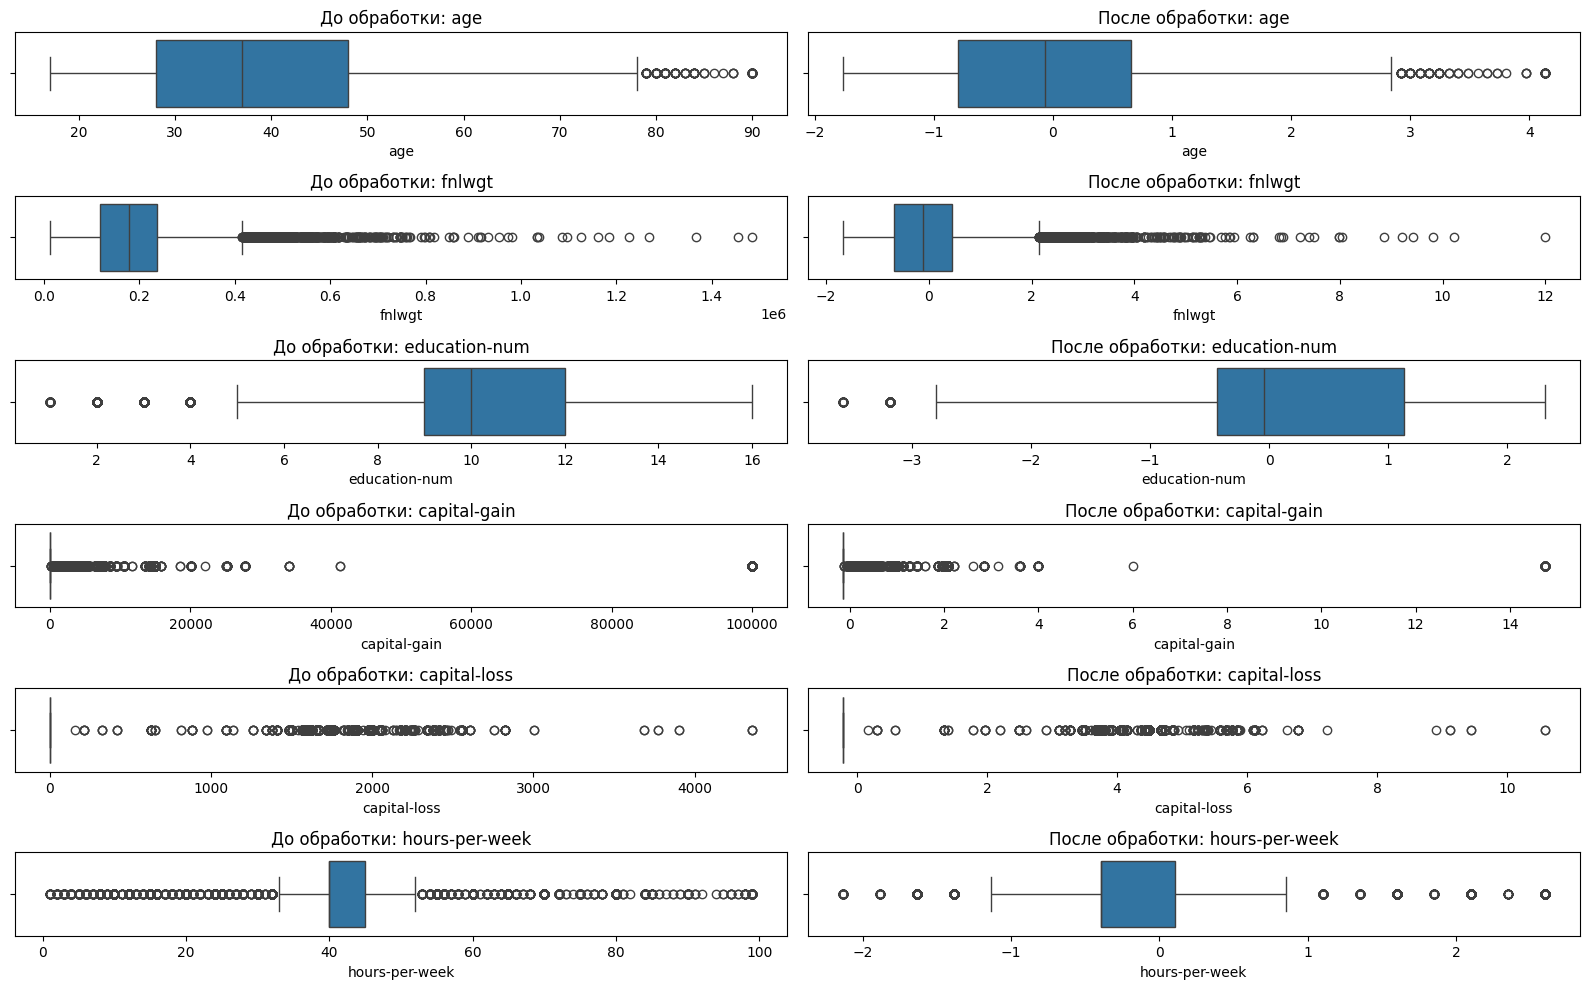

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(16, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, 2*i-1)
    sns.boxplot(x=df[col])
    plt.title(f'До обработки: {col}')
    
    plt.subplot(len(num_cols), 2, 2*i)
    sns.boxplot(x=df_clean[col])
    plt.title(f'После обработки: {col}')

plt.tight_layout()
plt.show()



### Гистограмма распределения

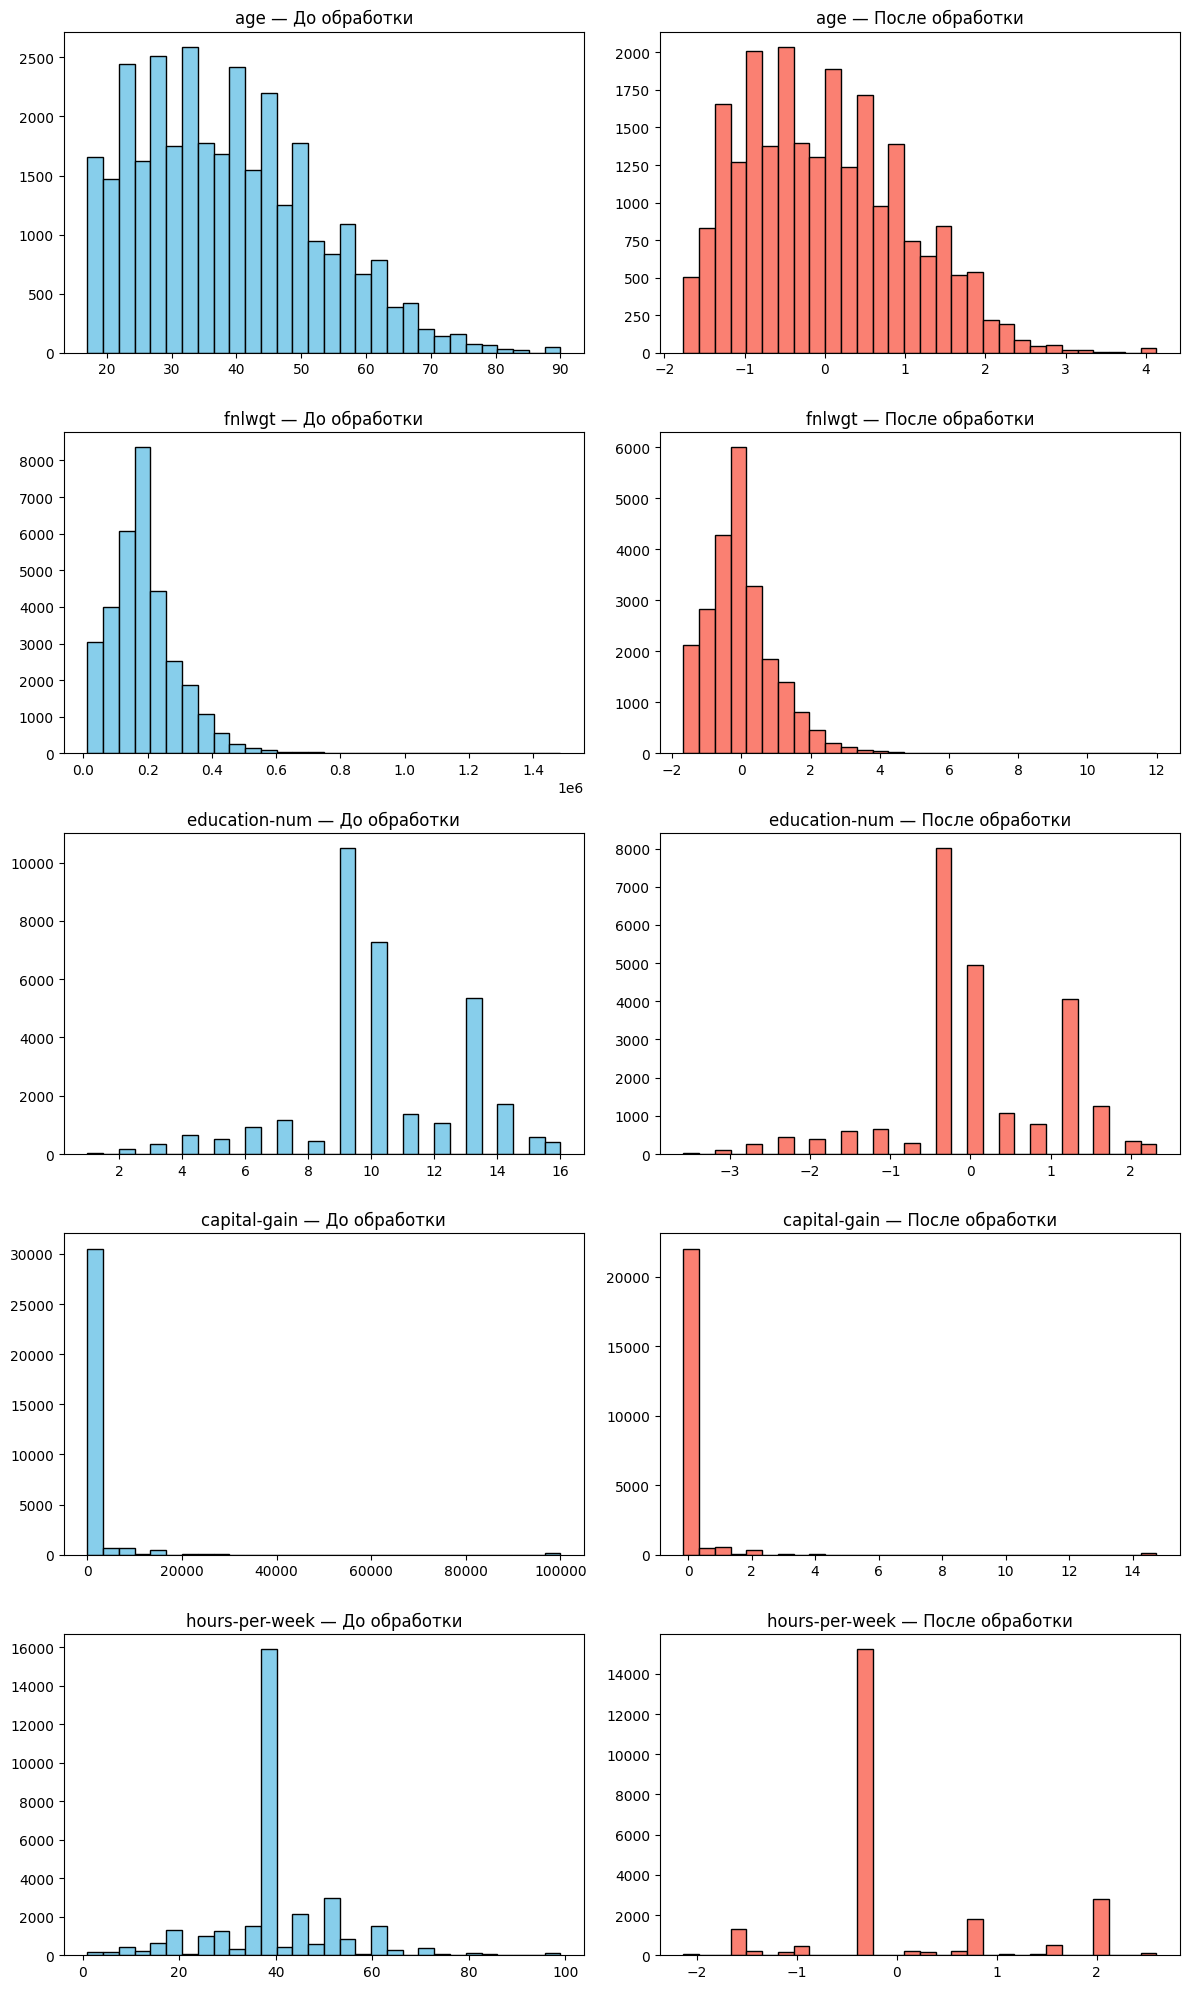

In [22]:
import matplotlib.pyplot as plt


features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'hours-per-week']

fig, axes = plt.subplots(len(features), 2, figsize=(12, 4*len(features)))

for i, feature in enumerate(features):

    axes[i, 0].hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'{feature} — До обработки')
    

    axes[i, 1].hist(df_clean[feature], bins=30, color='salmon', edgecolor='black')
    axes[i, 1].set_title(f'{feature} — После обработки')

plt.tight_layout()
plt.show()
